# Psicopatologia e creatività: Wikidata enquiry.

## Set up.

## Endpont e parametri per le SPARQL queries

In [2]:
%endpoint https://query.wikidata.org/sparql
%format any
%display table
%show 50

Endpoint set to: https://query.wikidata.org/sparql
Request format: ANY
Display: table
Result maximum size: 50

## Import per le visualizzazioni

In [7]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Queries

## 1. Numero di persone su Wikidata

In [3]:
SELECT (COUNT(?person) AS ?peopleCount)
WHERE {
	?person wdt:P31/wdt:P279* wd:Q5  .
}

peopleCount
11107438


## 2. Numero artisti su Wikidata

In [11]:
SELECT (COUNT(DISTINCT ?artist) AS ?artistsCount)
WHERE {
    #?artist wdt:P31 wd:Q5.(Runtime error)
    ?artist wdt:P106/wdt:P279+ wd:Q483501.
}

artistsCount
4703709


## Data visualization: artisti su Wikidata

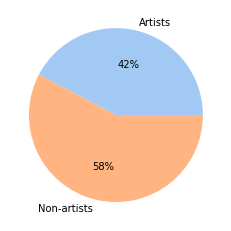

In [12]:
#define data
data = [42.3, 57.7]
labels = ['Artists', 'Non-artists']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## 3. I 'mental disorders' su Wikidata

In [12]:
SELECT DISTINCT ?mentalDisorderLabel 
WHERE {
    ?s wdt:P1050/wdt:P279* ?mentalDisorder;
       wdt:P31 wd:Q5.
    {?mentalDisorder wdt:P279* wd:Q12135} UNION {?mentalDisorder wdt:P31* wd:Q12135}.
    ?mentalDisorder rdfs:label ?mentalDisorderLabel.
    FILTER (lang(?mentalDisorderLabel) = "en")
}

mentalDisorderLabel
dementia
phobia
retrograde amnesia
developmental coordination disorder
paranoia
Diogenes syndrome
communication disorder
impulse control disorder
antisocial personality disorder
Wilson disease


## 4. Numero artisti affetti da 'mental disorders'

In [89]:
SELECT  (COUNT (DISTINCT ?artist) as ?artistsCount) 
WHERE { 
  #?artist wdt:P31 wd:Q5. 
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:P279+ wd:Q12135.
}  

artistsCount
1472


La <b>percentuale</b> di artisti con mental disorder sul totale degli artisti è: <b>0.031%</b>

## 5. Artisti e relativi 'mental disorders'

In [13]:
SELECT DISTINCT ?artistLabel (group_concat(DISTINCT ?medicalConditionLabel; separator=", ") as ?medicalConditions)  
WHERE {
      ?artist wdt:P106/wdt:P279+ wd:Q483501.
      ?artist wdt:P1050 ?medicalCondition.
      ?medicalCondition wdt:P279+ wd:Q12135.
      ?medicalCondition rdfs:label ?medicalConditionLabel.
      FILTER (lang(?medicalConditionLabel) = "en")
      SERVICE wikibase:label {bd:serviceParam wikibase:language "en".}    }
GROUP BY ?artistLabel

artistLabel,medicalConditions
Harriet Kemsley,developmental coordination disorder
Maju Lozano,autism
Jack Welch,stuttering
Bruce Willis,"aphasia, stuttering, frontotemporal dementia"
Raul Seixas,mental depression
Jerry Pinkney,dyslexia
Jessica McCabe,attention deficit hyperactivity disorder
Brianna Wu,post-traumatic stress disorder
Natsuki Aso,nicotine dependence
Edward Benson,bipolar disorder


## 6. Numero di artisti per ciascun 'disturbo mentale'

In [76]:
SELECT ?diseaseLabel (count(distinct ?artist) as ?artistNumber)
WHERE {
      ?artist wdt:P31 wd:Q5.
      ?artist wdt:P106/wdt:P279+ wd:Q483501.
      ?artist wdt:P1050 ?disease.
      ?disease wdt:P279+ wd:Q12135.
      ?disease rdfs:label ?diseaseLabel.
      FILTER (lang(?diseaseLabel) = "en")
}
GROUP BY ?diseaseLabel
ORDER BY DESC (?artistNumber)

diseaseLabel,artistNumber
bipolar disorder,266
dyslexia,212
autism,198
stuttering,123
Asperger syndrome,102
attention deficit hyperactivity disorder,102
schizophrenia,100
mental depression,98
alcoholism,41
obsessive-compulsive disorder,37


# Data visualization: numero di artisti per 'mental disorder'.

Un esempio di visualizzazione per i <b>sette</b> disordini più comuni (balbuzie esclusa).

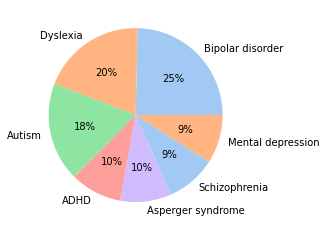

In [15]:
#define data
data = [24.6,19.5, 18.4, 9.6, 9.5, 9.3, 9.0]
labels = ['Bipolar disorder', 'Dyslexia', 'Autism', 'ADHD', 'Asperger syndrome', 'Schizophrenia', 'Mental depression']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## 7. Numero di persone e di artisti affetti da bipolarismo.

Il <b>bipolarismo</b> risulta il disturbo più diffuso tra gli artisti. 

Su Wikidata, quante persone soffrono di bipolarismo?

In [70]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE { 
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q131755.
}  

peopleCount
381


... e quanti artisti?

In [71]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE { 
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q131755.
}  

artistCount
266


Su wikidata, la percentuale di artisti affetti da bipolarismo sul totale delle persone affette da bipolarismo è: <b>67%</b>.

Ripetiamo la queries per le altre sei patologie più diffuse e diamo una resa grafica dei risultati.

## Dislessia

In [72]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE { 
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q132971.
}  

peopleCount
288


In [73]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE { 
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q132971.
}  

artistCount
212


Su Wikidata, la percentuale di artisti affetti da dislessia sul totale delle persone affette da dislessia è: <b>74%</b>.

## Autismo

In [74]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE { 
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q38404.
}  

peopleCount
261


In [75]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE { 
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q38404.
}  

artistCount
198


Su Wikidata, la percentuale di artisti affetti da autismo sul totale delle persone affette da autismo è: <b>76%</b>.

## ADHD.

In [78]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE { 
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q181923.
}  

peopleCount
122


In [79]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE { 
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q181923.
}  

artistCount
102


Su Wikidata, la percentuale di artisti affetti da ADHD sul totale delle persone affette da ADHD è: <b>84%</b>.

## Asperger

In [80]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE { 
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q161790.
}  

peopleCount
131


In [81]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE {
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q161790.
}  

artistCount
102


Su Wikidata, la percentuale di artisti affetti da sindrome di asperger sul totale delle persone affette da sindrome di asperger è: <b>78%</b>.

## Schizofrenia.

In [83]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE {
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q41112.
}  

peopleCount
143


In [84]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE {
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q41112.
}  

artistCount
100


Su Wikidata, la percentuale di artisti affetti da schizofrenia sul totale delle persone affette da schizofrenia è: <b>70%</b>.

# Mental depression.

In [85]:
SELECT (COUNT(DISTINCT ?person) as ?peopleCount)
WHERE {
  ?person wdt:P31 wd:Q5.
  ?person wdt:P1050/wdt:P279* wd:Q4340209.
}  

peopleCount
168


In [86]:
SELECT (COUNT(DISTINCT ?artist) as ?artistCount)
WHERE {
  ?artist wdt:P31 wd:Q5.
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:279* wd:Q4340209.
}  

artistCount
98


Su Wikidata, la percentuale di artisti affetti da 'mental depression' sul totale delle persone affette da 'mental depression' è: <b>58%</b>.

# Data visualization: artisti sul totale di persone affette da data patologia

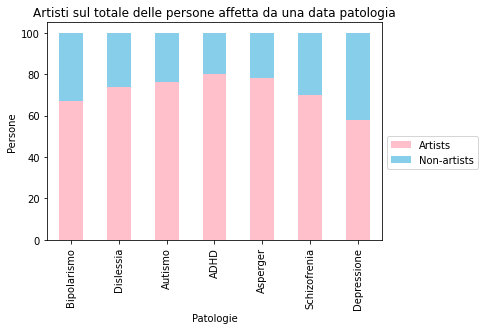

In [87]:
# import necessary libraries
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
 
# create DataFrame
df = pd.DataFrame({'Artists': [67, 74, 76, 80, 78, 70, 58],
                   'Non-artists': [33, 26, 24, 20, 22, 30, 42]
                  },
                  index=['Bipolarismo', 'Dislessia', 'Autismo', 'ADHD', 'Asperger', 'Schizofrenia', 'Depressione'])
 
 
# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['pink', 'skyblue'])

# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# labels for x & y axis
plt.xlabel('Patologie')
plt.ylabel('Persone')
 
# title of plot
plt.title('Artisti sul totale delle persone affetta da una data patologia')
plt.show()

## 8. Numero di artisti con mental disorder divisi per occupazione.

In [90]:
SELECT ?occupationLabel (count(distinct ?artist) as ?artistNumber)
WHERE {
      ?artist wdt:P31 wd:Q5.
      ?artist wdt:P106 ?occupation.
      ?occupation wdt:P279+ wd:Q483501.
      ?occupation rdfs:label ?occupationLabel.
      ?artist wdt:P1050 ?disease.
      ?disease wdt:P279+ wd:Q12135.
      FILTER (lang(?occupationLabel) = "en")
}
GROUP BY ?occupationLabel
ORDER BY DESC (?artistNumber) 

occupationLabel,artistNumber
writer,399
actor,358
singer,260
film actor,219
television actor,193
screenwriter,170
musician,139
composer,122
singer-songwriter,112
poet,102


## Data visualization: artisti affetti da disorder con relativa occupazione

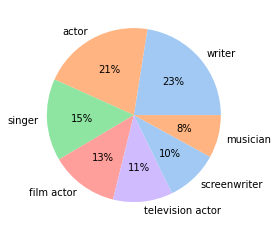

In [16]:
#define data
data = [22.3,20.6, 15.1, 12.5, 11, 9.7, 7.9]
labels = ['writer', 'actor', 'singer', 'film actor', 'television actor', 'screenwriter', 'musician']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## 9. Artisti con mental disorders e relative date di nascita e morte

In [16]:
%endpoint https://query.wikidata.org/sparql
%format json
%display table
%show 50
%outfile C:\Users\Francesca\birth_death.json

SELECT DISTINCT ?artistLabel ?yearOfBirth ?yearOfDeath
WHERE {
      ?artist wdt:P106/wdt:P279+ wd:Q483501;
              rdfs:label ?artistLabel;
              wdt:P569 ?dateOfBirth;
              wdt:P570 ?dateOfDeath;
              wdt:P1050 ?medicalCondition.
      ?medicalCondition wdt:P279+ wd:Q12135.
      BIND(year(?dateOfBirth) AS ?yearOfBirth)
      BIND(year(?dateOfDeath) AS ?yearOfDeath)
      FILTER (lang(?artistLabel) = "en")
  }
ORDER BY ?yearOfBirth

Endpoint set to: https://query.wikidata.org/sparql
Request format: JSON
Display: table
Result maximum size: 50
Output file: C:\Users\Francesca\birth_death.json

artistLabel,yearOfBirth,yearOfDeath
Demosthenes,-383,-321
Aristotle,-383,-321
Han Fei,-279,-232
Sima Xiangru,-178,-116
Yang Xiong,-52,18
Claudius,-9,54
Notker the Stammerer,840,912
Niccolò Tartaglia,1499,1557
Ivan IV Vasilyevich,1530,1584
Juan Fernández Navarrete,1538,1579


## Data visualization: artisti affetti da disorder divisi per data di nascita.

In [30]:
import json
 
# Opening JSON file
f = open('birth_death.json', encoding = 'UTF-8')
 
# returns JSON object as a dictionary
data = json.load(f)
 
occurrences = len(data['results']['bindings'])

n = 0
dates =[]
while occurrences:
    dates.append(int(data['results']['bindings'][n]['yearOfBirth']['value']))
    n +=1
    occurrences -=1
#print(dates)

centuries = {'antiquity': 0,'XV': 0, 'XVI': 0, 'XVII': 0, 'XVIII': 0, 'XIX': 0, 'XX': 0, 'XXI': 0}

for date in dates:
    if date < 1400:
        centuries['antiquity'] += 1 
    if date >= 1400 and date < 1500:
        centuries['XV'] += 1
    if date >= 1500 and date < 1600:
        centuries['XVI'] += 1
    if date >= 1600 and date < 1700:
        centuries['XVII'] += 1
    if date >= 1700 and date < 1800:
        centuries['XVIII'] += 1
    if date >= 1800 and date < 1900:
        centuries['XIX'] += 1
    if date >= 1900 and date < 2000:
        centuries['XX'] += 1
    if date >= 2000:
        centuries['XXI'] += 1
print(centuries)    

 
# Closing file
f.close()

{'antiquity': 7, 'XV': 1, 'XVI': 3, 'XVII': 2, 'XVIII': 13, 'XIX': 113, 'XX': 413, 'XXI': 1}


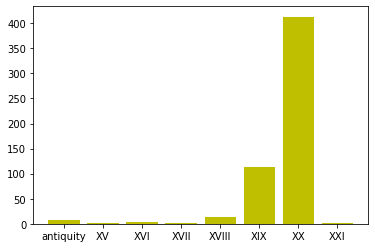

In [31]:
plt.bar(list(centuries.keys()), centuries.values(), color='y')
plt.show()